findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


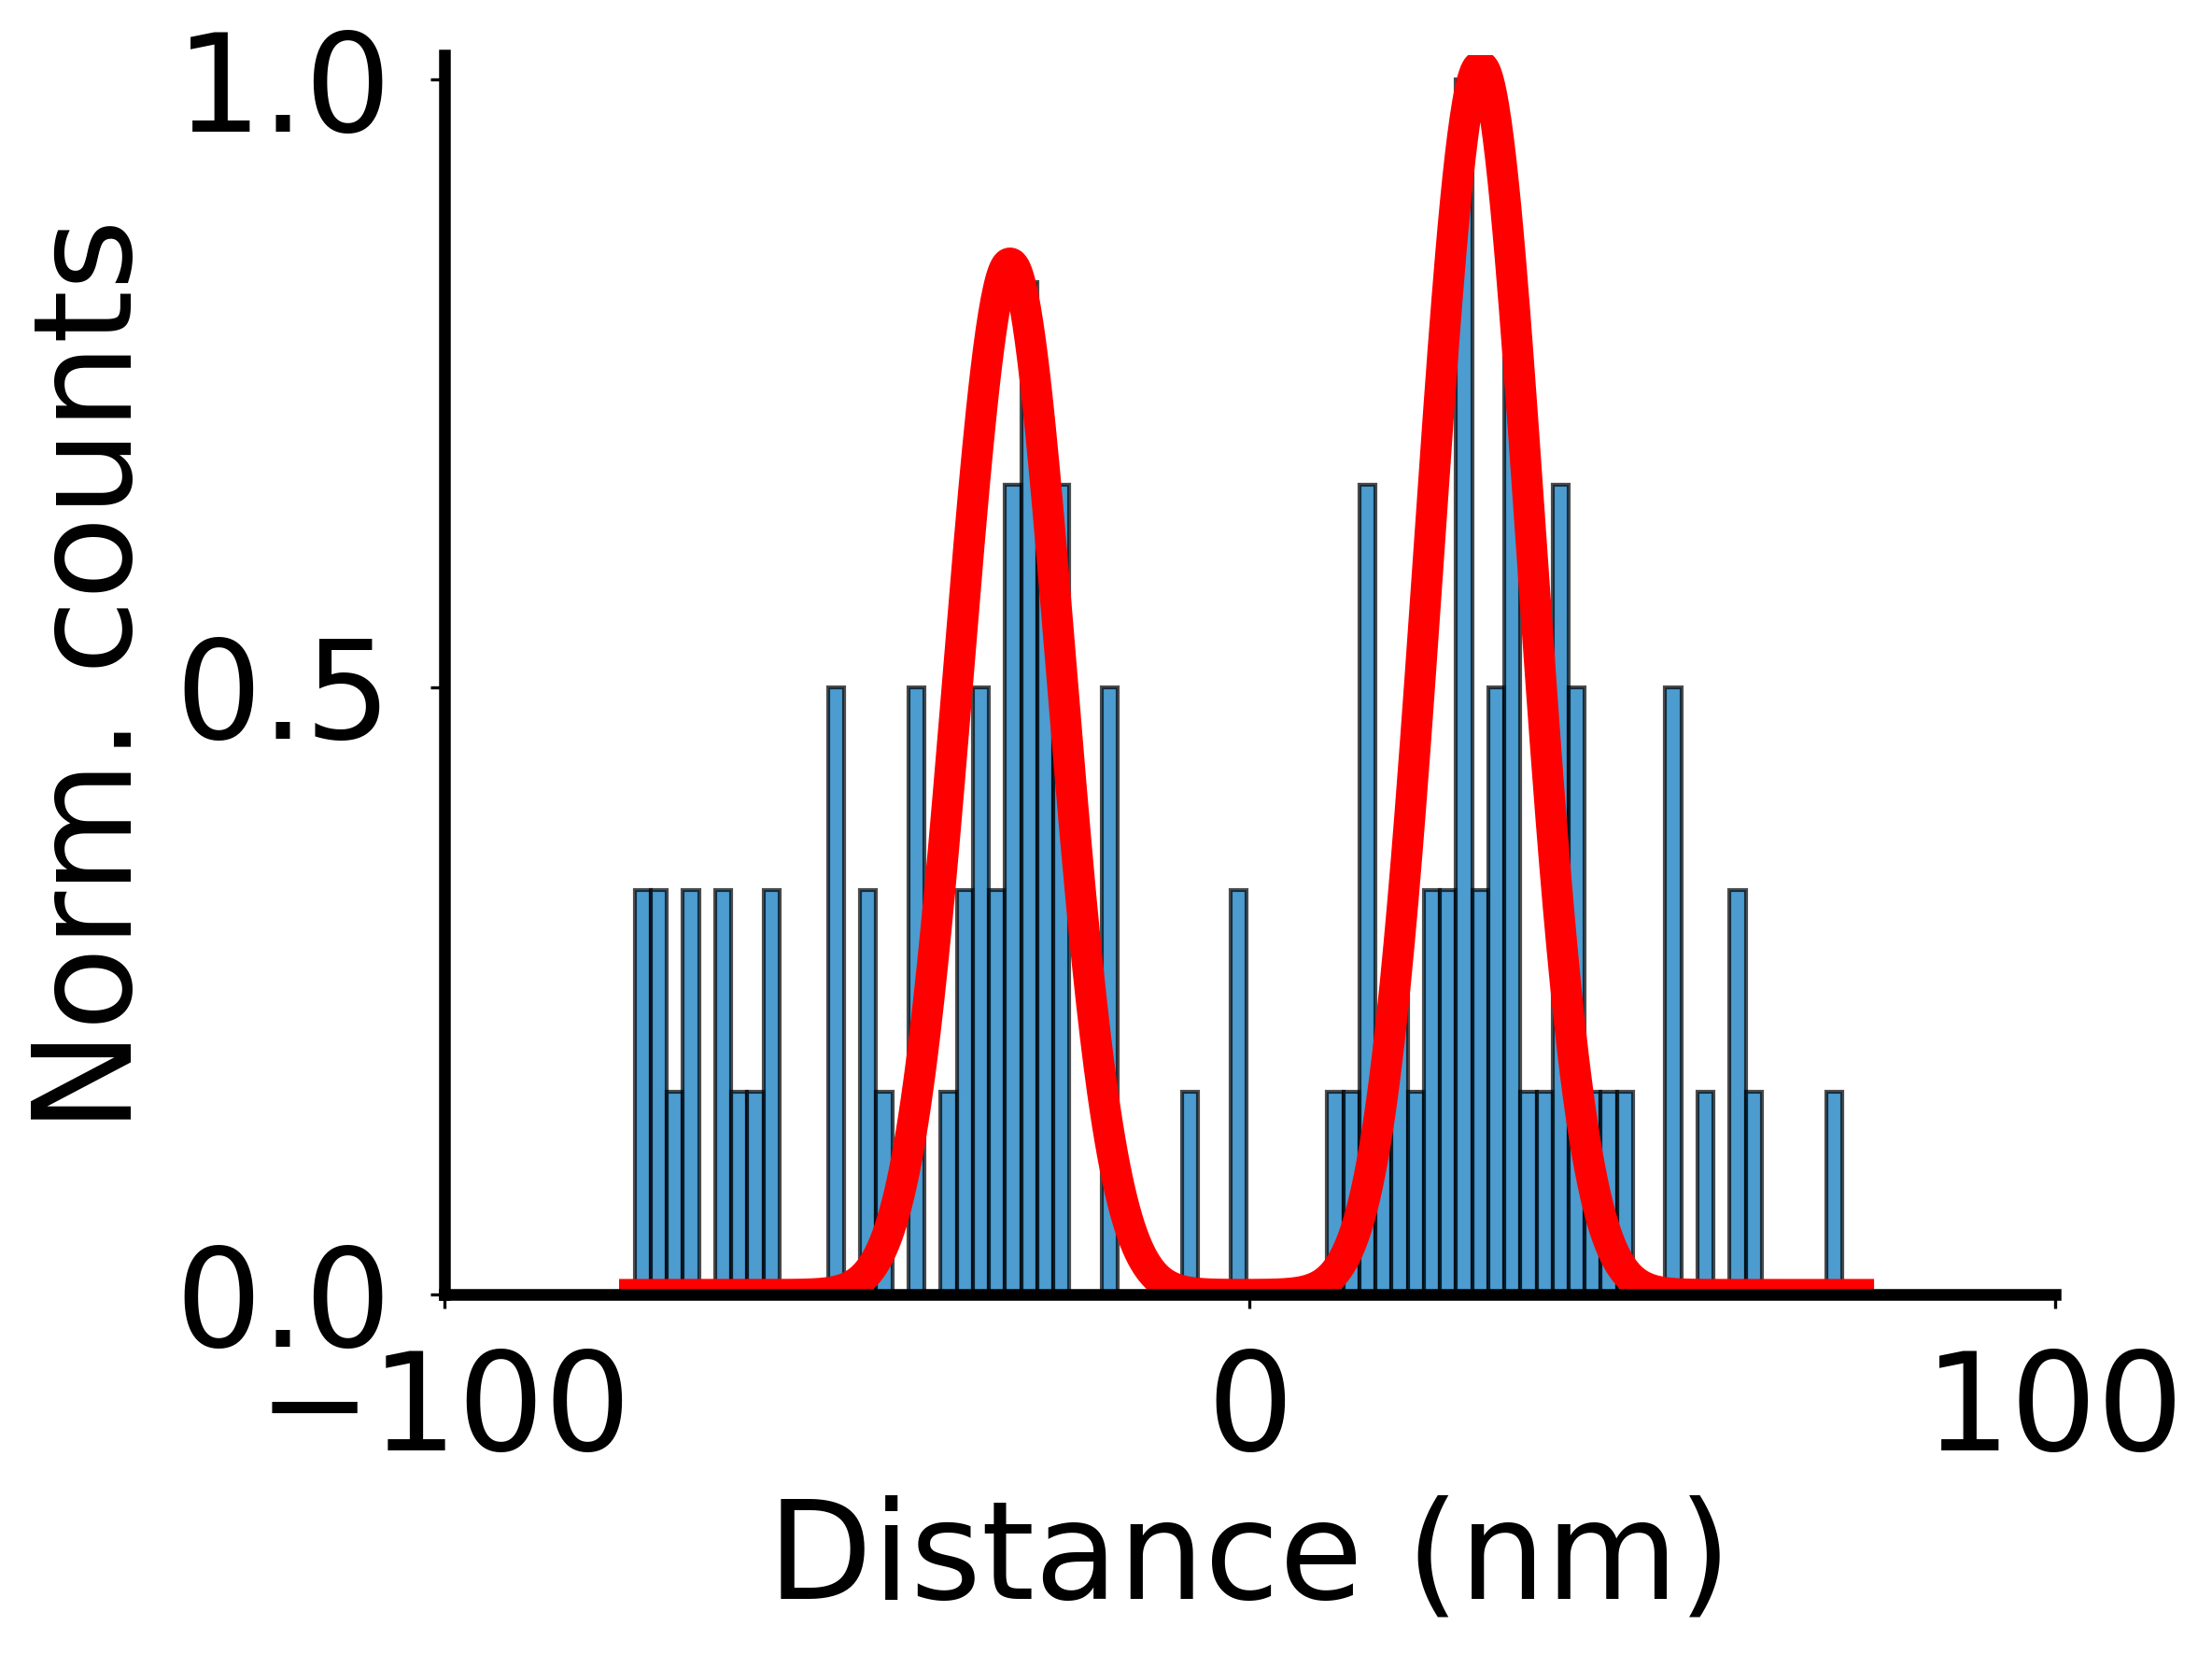

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


data_line = np.loadtxt('/data1/ALLData/GaoQF/STORM/output_csv/Actin1129/0-20w/decode_hist.txt')
x_line = data_line[:, 0]
y_line = data_line[:, 1]

data_bar = np.loadtxt('/data1/ALLData/GaoQF/STORM/output_csv/Actin1129/0-20w/decode_line.txt')
x_bar = data_bar[:, 0]
y_bar = data_bar[:, 1]

def normalize(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))

y_line_normalized = normalize(y_line)
y_bar_normalized = normalize(y_bar)

f_interp = interp1d(x_line, y_line_normalized, kind='cubic')
x_smooth = np.linspace(x_line.min(), x_line.max(), 1000)
y_smooth = f_interp(x_smooth)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

ax.plot(x_smooth, y_smooth, color='red', linewidth=8, antialiased=True, label='Smoothed Fitted Curve')

ax.bar(x_bar, y_bar_normalized, width=2, color=(0, 0.4470, 0.7410), edgecolor='black', align='edge', alpha=0.7, label='Normalized Histogram')

ax.set_xlabel('Distance (nm)', fontsize=35, fontname='Arial')
ax.set_ylabel('Norm. counts', fontsize=35, fontname='Arial')

ax.set_yticks([0, 0.5, 1])
ax.set_xticks([-100, 0, 100])

ax.set_xlim(-100, 100)
ax.set_ylim(0, 1.02)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='x', which='major', pad=10, labelrotation=0, labelsize=35, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', which='major', pad=10, labelrotation=0, labelsize=35, labelleft=True, labelright=False)

plt.tight_layout()
plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


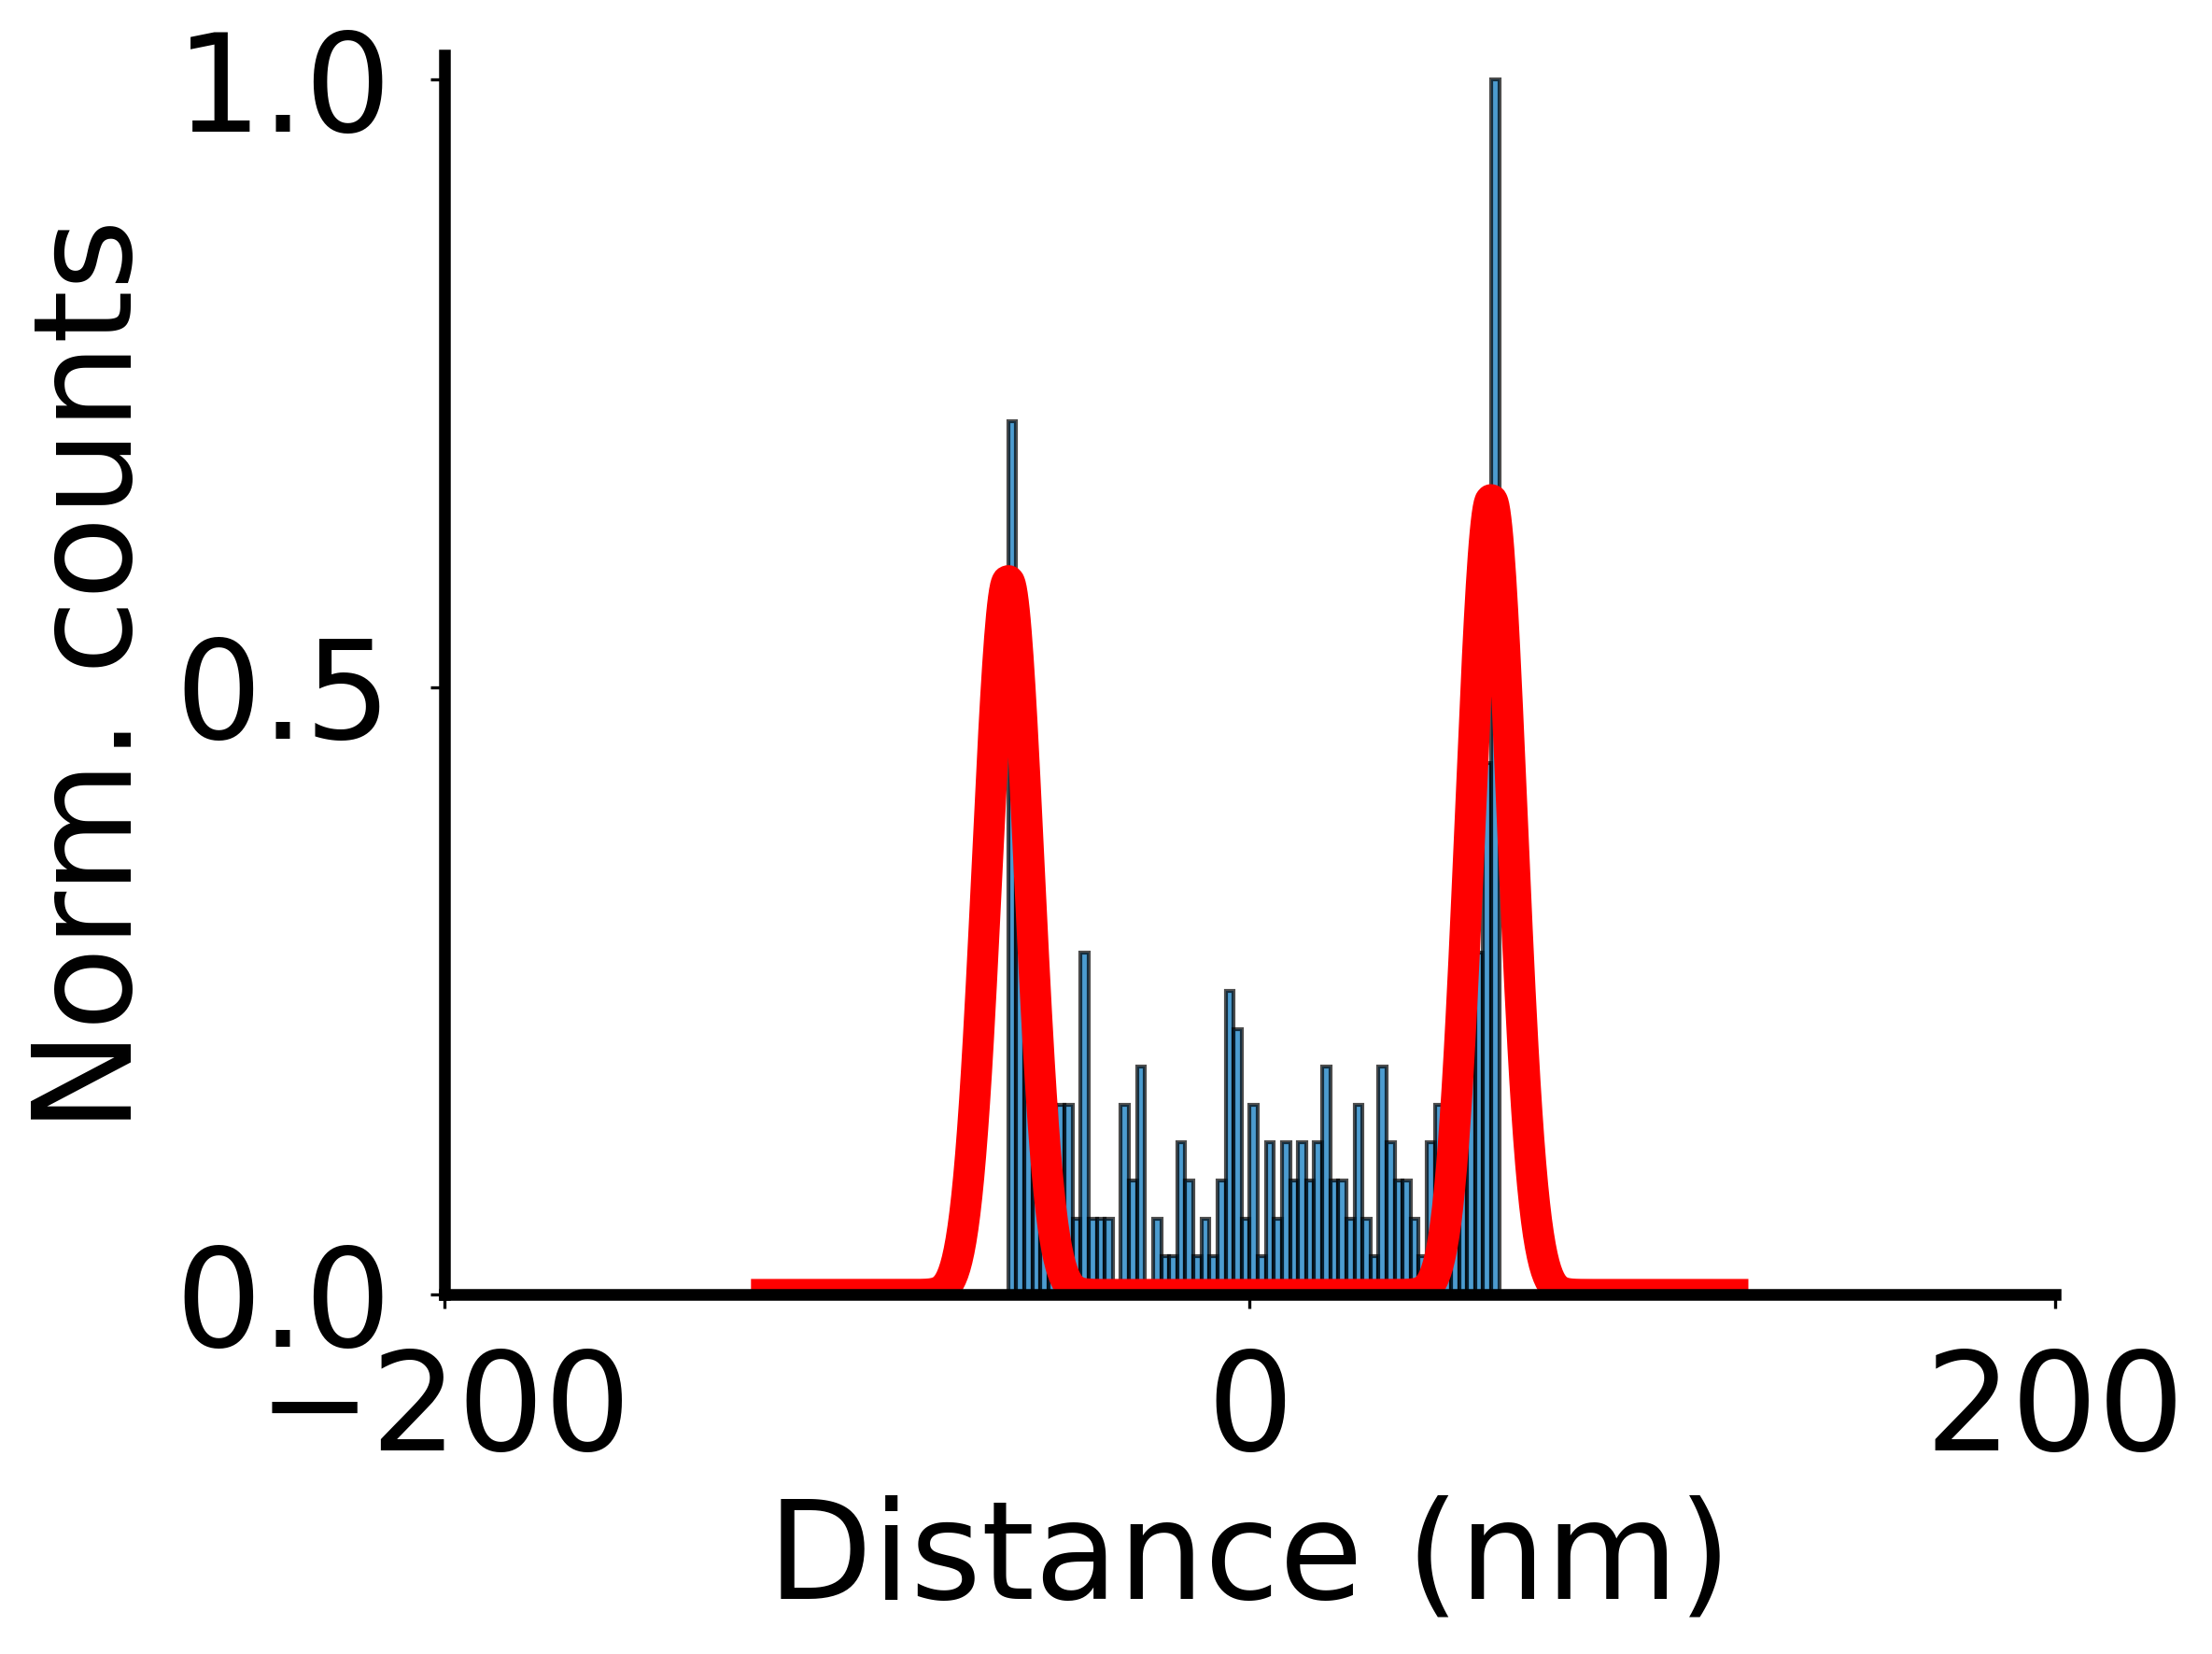

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.interpolate import interp1d

data_bar = np.loadtxt('/data1/ALLData/GaoQF/STORM/data/Fig2_simudata/simu_160nm/nk_beads/DL_result/GT/120nmcylinder_gt_z0_line.txt')
x_bar = data_bar[:, 0]
y_bar = data_bar[:, 1]

def normalize(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))

y_bar_normalized = normalize(y_bar)


def double_gaussian(x, a1, a2, sigma):
    return a1 * norm.pdf(x, -60, sigma) + a2 * norm.pdf(x, 60, sigma)


params_opt, params_cov = curve_fit(
    f=double_gaussian,
    xdata=x_bar,
    ydata=y_bar_normalized,
    p0=[1, 1, 10]  
)

a1_opt, a2_opt, sigma_opt = params_opt

x_fit_full = np.linspace(-120, 120, 1000)
y_fit_full = double_gaussian(x_fit_full, a1_opt, a2_opt, sigma_opt)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

ax.bar(x_bar, y_bar_normalized, width=2, color=(0, 0.4470, 0.7410), edgecolor='black', align='edge', alpha=0.7, label='Normalized Histogram')

ax.plot(x_fit_full, y_fit_full, 'r-', lw=8, label='Double Gaussian Fit (Full Range)')

ax.set_xlabel('Distance (nm)', fontsize=35, fontname='Arial')
ax.set_ylabel('Norm. counts', fontsize=35, fontname='Arial')

ax.set_yticks([0, 0.5, 1])
ax.set_xticks([-200, 0, 200])

ax.set_xlim(-200, 200)
ax.set_ylim(0, 1.02)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='x', which='major', pad=10, labelrotation=0, labelsize=35, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', which='major', pad=10, labelrotation=0, labelsize=35, labelleft=True, labelright=False)

plt.tight_layout()
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


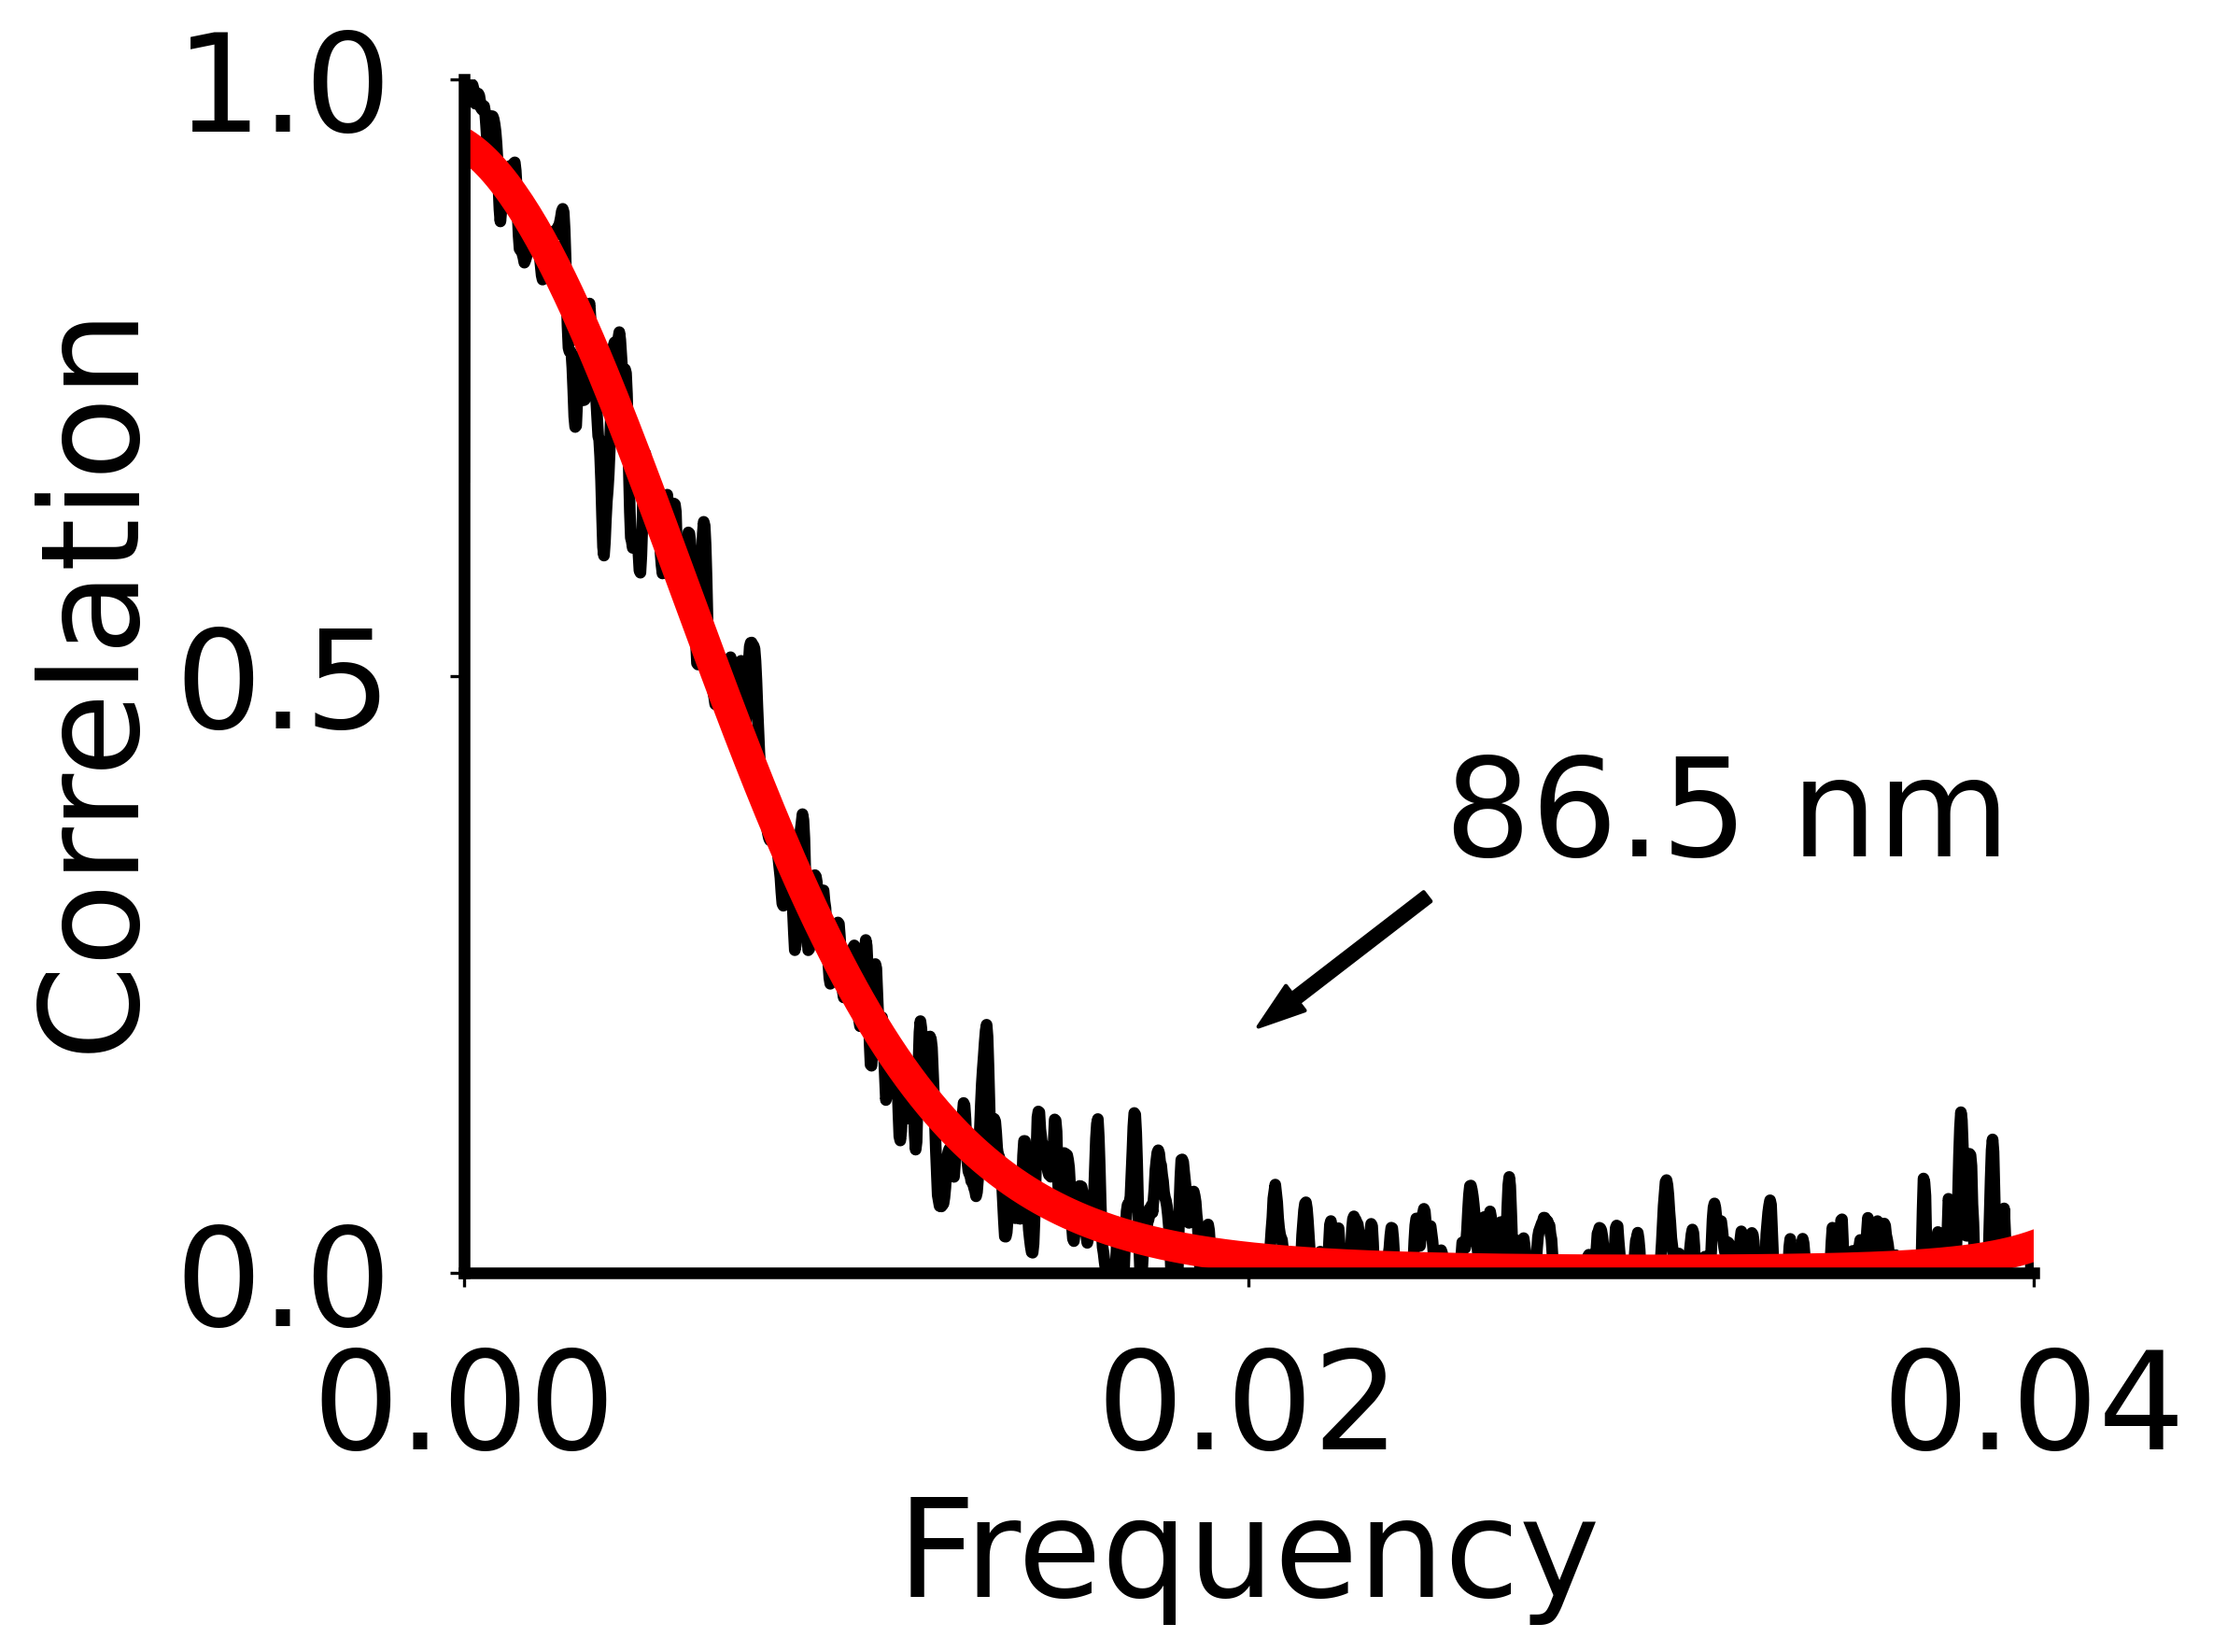

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat_file_path = '/data1/ALLData/GaoQF/STORM/data/FRC/cube/gaussian_RRNPC_ROI_FRC_86.5nm.mat'
mat_data = loadmat(mat_file_path)

frequence = mat_data['frequence'].flatten()
cur_curve = mat_data['cur_curve'].flatten()

def normalize(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))

cur_curve_normalized = normalize(cur_curve)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

#ax.scatter(frequence, cur_curve, color='red', s=20, antialiased=True, label='Scatter Points')
plt.plot(frequence, cur_curve, label='FRC Curve', color='black', linewidth=3)

def softplus(x):
    return np.log(1 + np.exp(x))

poly_fit = np.poly1d(np.polyfit(frequence, cur_curve, deg=3))

def poly_softplus(x, a, b, c, d):
    return softplus(a * x**3 + b * x**2 + c * x + d)

from scipy.optimize import curve_fit
params, params_cov = curve_fit(poly_softplus, frequence, cur_curve, p0=[1, 1, 1, 0])

x_fit = np.linspace(frequence.min(), frequence.max(), 500)
y_fit = poly_softplus(x_fit, *params)

plt.plot(x_fit, y_fit, '-', label='Softplus-constrained Fit', color='red', linewidth=8)

ax.set_xlabel('Frequency', fontsize=35, fontname='Arial')
ax.set_ylabel('Correlation', fontsize=35, fontname='Arial')


ax.set_yticks([0, 0.5, 1])
#ax.set_xticks([-200, 200, 600])

ax.set_xlim(0, 0.04)
ax.set_ylim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

ax.tick_params(axis='x', which='major', pad=15, labelrotation=0, labelsize=35, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', which='major', pad=15, labelrotation=0, labelsize=35, labelleft=True, labelright=False)

#ax.legend(fontsize=25, loc='upper right')
x_annotate = 0.02
y_annotate = 0.2

ax.annotate('86.5 nm',
            xy=(x_annotate, y_annotate),
            xytext=(x_annotate + 0.005, y_annotate + 0.15),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=8),
            fontsize=35,
            fontname='Arial',
            color='black')

plt.tight_layout()
plt.show()
